# Boosting (Hypothesis Boosting)

* Combine several weak learners into a strong learner. 

* Train predictors sequentially

# AdaBoost / Adaptive Boosting

[Robert Schapire](http://rob.schapire.net/papers/explaining-adaboost.pdf)

[Wikipedia](https://en.wikipedia.org/wiki/AdaBoost)

[Chris McCormick](http://mccormickml.com/2013/12/13/adaboost-tutorial/)

[Scikit Learn AdaBoost](http://scikit-learn.org/stable/modules/ensemble.html#adaboost)

1995

As above for Boosting:
* Similar to human learning, the algo learns from past mistakes by focusing more on difficult problems it did not get right in prior learning. 
* In machine learning speak, it pays more attention to training instances that previously underfitted.

Source: Scikit-Learn:

* Fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. 
* The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.
* The data modifications at each so-called boosting iteration consist of applying weights $w_1, w_2, …, w_N$ to each of the training samples. 
* Initially, those weights are all set to $w_i = 1/N$, so that the first step simply trains a weak learner on the original data. 
* For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. 
* At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. 
* As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.



In [43]:
import numpy as np
import pandas as pd

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = sns.load_dataset('titanic')

In [46]:
df.shape

(891, 15)

In [47]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


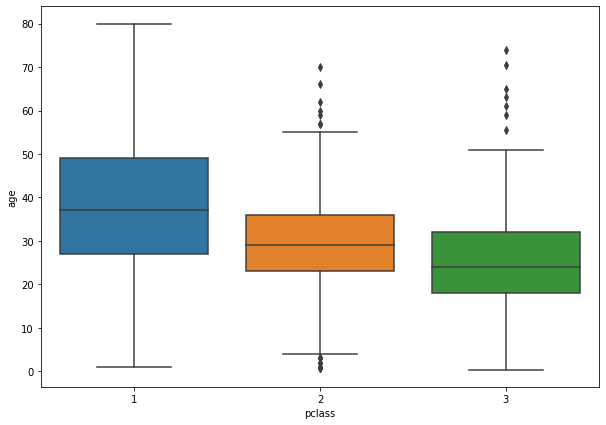

In [48]:
plt.figure(figsize=(10,7))
sns.boxplot(x='pclass',y='age',data=df)

In [49]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [50]:
df['age'] = df[['age','pclass']].apply(impute_age, axis=1)

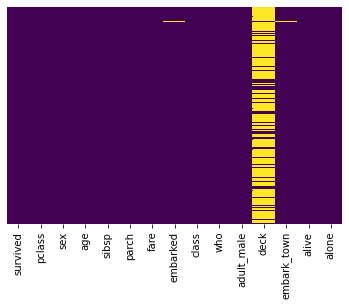

In [51]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [52]:
df.drop('deck', axis=1, inplace=True)

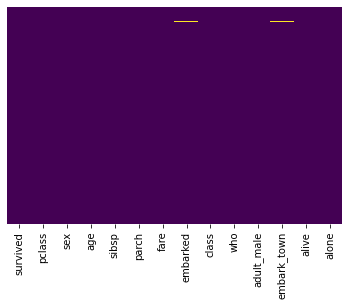

In [53]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [54]:
df.dropna(inplace=True)

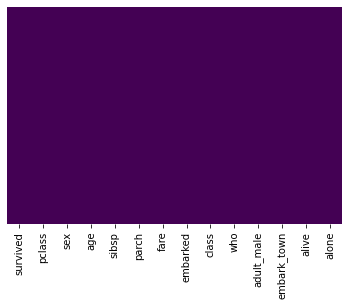

In [55]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [56]:
X = df[['pclass', 'sex', 'age']]
X['sex'] = pd.get_dummies(df['sex'],drop_first=True)
y = df['survived']

<ipython-input-56-e4d873edef6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = pd.get_dummies(df['sex'],drop_first=True)


In [57]:
X.shape

(889, 3)

In [58]:
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
ada_clf = AdaBoostClassifier()

In [65]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier()

In [66]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.8183

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       382
           1       0.76      0.78      0.77       240

    accuracy                           0.82       622
   macro avg       0.81      0.81      0.81       622
weighted avg       0.82      0.82      0.82       622


Confusion Matrix: 
 [[321  61]
 [ 52 188]]

Average Accuracy: 	 0.7878
Accuracy SD: 		 0.0504


In [67]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8090

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       167
           1       0.71      0.82      0.76       100

    accuracy                           0.81       267
   macro avg       0.80      0.81      0.80       267
weighted avg       0.82      0.81      0.81       267


Confusion Matrix: 
 [[134  33]
 [ 18  82]]



## AdaBoost with Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
ada_clf = AdaBoostClassifier(RandomForestClassifier())

In [70]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [71]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.8810

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       382
           1       0.90      0.78      0.83       240

    accuracy                           0.88       622
   macro avg       0.89      0.86      0.87       622
weighted avg       0.88      0.88      0.88       622


Confusion Matrix: 
 [[362  20]
 [ 54 186]]

Average Accuracy: 	 0.8022
Accuracy SD: 		 0.0341


In [72]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8202

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       167
           1       0.82      0.67      0.74       100

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.82       267


Confusion Matrix: 
 [[152  15]
 [ 33  67]]



### Gradient Boosting / Gradient Boosting Machine(GBM)

Works for both regression and Classification

* It Sequentially ADD predictors
* Each one correcting its predecessor.
* Fit new predictor to the residual errors.

Compare this to AdaBoost:
* Alter instance weight at every iteration

*Step1  $$Y = F(x) + e$$
*Step2  $$e = G(x) + e2$$
*Step3  $$e2 = H(x) + e3$$
*Now:   $$Y = F(x) + G(x) + H(x) + e3$$
**Finally, by adding weight**
       $$Y = \alpha F(x) + \beta G(x) + \gamma H(x)  + \epsilon_4$$
    

Gradient boosting involves three elements:

* **Loss function to be optimized**: Loss function depends on the type of problem being solved. In the case of regression problems, mean squared error is used, and in classification problems, logarithmic loss will be used. In boosting, at each stage, unexplained loss from prior iterations will be optimized rather than starting from scratch.

* **Weak learner to make predictions**: Decision trees are used as a weak learner in gradient boosting.

* **Additive model to add weak learners to minimize the loss function**: Trees are added one at a time and existing trees in the model are not changed. The gradient descent procedure is used to minimize the loss when adding trees.

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [75]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.8650

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       382
           1       0.86      0.77      0.81       240

    accuracy                           0.86       622
   macro avg       0.86      0.85      0.85       622
weighted avg       0.86      0.86      0.86       622


Confusion Matrix: 
 [[353  29]
 [ 55 185]]

Average Accuracy: 	 0.8070
Accuracy SD: 		 0.0416


In [76]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=False) # Test

Test Result:

accuracy score: 0.8165

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       167
           1       0.78      0.71      0.74       100

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.81      0.82      0.81       267


Confusion Matrix: 
 [[147  20]
 [ 29  71]]




# XGBoost (Extreme Gradient Boosting)

[Documentation](http://xgboost.readthedocs.io/en/latest/)

[tqchen github](https://github.com/tqchen/xgboost/tree/master/demo/guide-python)

[dmlc github](https://github.com/dmlc/xgboost)

* “Gradient Boosting” is proposed in the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman. 
* XGBoost is based on this original model. 

* Supervised Learning

## Objective Function : Training Loss + Regularization

$$Obj(Θ)=L(θ)+Ω(Θ)$$

* $L$ is the training loss function, and 
* $Ω$ is the regularization term. 

### Training Loss

The training loss measures how predictive our model is on training data.

Example 1, Mean Squared Error for Linear Regression:

$$L(θ)= \sum_i(y_i-\hat{y}_i)^2$$

Example 2, Logistic Loss for Logistic Regression:

$$ L(θ) = \sum_i \large[ y_i ln(1 + e^{-\hat{y}_i}) + (1-y_i) ln(1 + e^{\hat{y}_i}) \large] $$

### Regularization Term

The regularization term controls the complexity of the model, which helps us to avoid overfitting. 

[XGBoost vs GBM](https://www.quora.com/What-is-the-difference-between-the-R-gbm-gradient-boosting-machine-and-xgboost-extreme-gradient-boosting/answer/Tianqi-Chen-1)

* Specifically,  xgboost used a more regularized model formalization to control over-fitting, which gives it better performance.

* For model, it might be more suitable to be called as regularized gradient boosting.

In [77]:
!python -m pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\himan\anaconda3\lib\site-packages (20.2.4)


In [78]:
!pip install xgboost

In [79]:
# Download whl file from location - https://www.lfd.uci.edu/~gohlke/pythonlibs/#xgboost
#!pip install c:/Users/user/Downloads/xgboost-0.71-cp36-cp36m-win_amd64.whl

In [80]:
import xgboost as xgb

In [81]:
xgb_clf = xgb.XGBClassifier(max_depth=3, n_estimators=5000, learning_rate=0.2,
                            n_jobs=-1)

In [82]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.8762

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       382
           1       0.88      0.79      0.83       240

    accuracy                           0.88       622
   macro avg       0.88      0.86      0.87       622
weighted avg       0.88      0.88      0.87       622


Confusion Matrix: 
 [[356  26]
 [ 51 189]]

Average Accuracy: 	 0.7958
Accuracy SD: 		 0.0362


In [84]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8015

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       167
           1       0.76      0.69      0.72       100

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267


Confusion Matrix: 
 [[145  22]
 [ 31  69]]

